## **PFDA Assignment 6: Knock Weather**

Author: *Paul Cahill*

In this final assignment I will import a CSV containing weather data from Knock airport. I will use that data to plot the following:

- The temperature at Knock airport.
- The mean temperature each day.
- The mean temperature for each month.
- The Windspeed.
- The rolling windspeed (over 24 hours).
- The max windspeed for each day.

Let's start by importing our libraries and then pulling in the CSV.

In [99]:
# Data Frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Load the data set
df = pd.read_csv("hly4935.csv", header=24)

df.columns = ["date", "ind_rain", "rain", "ind_temp", "temp", "ind_wetb", "wetb", "dewpt", 
    "vappr", "rhum", "msl", "ind_wdsp", "wdsp", "ind_wddir", "wddir", "ww", "w", 
    "sun", "vis", "clht", "clamt"]

C:\Users\pcahill\AppData\Local\Temp\ipykernel_21204\3929319294.py:8: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("hly4935.csv", header=24)


I'm going to manipulate some of the data as it will make it more managebale for our plots:

In [100]:
df['date'] = pd.to_datetime(df['date'])

df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

C:\Users\pcahill\AppData\Local\Temp\ipykernel_21204\2013280660.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


The temperature at Knock airport:

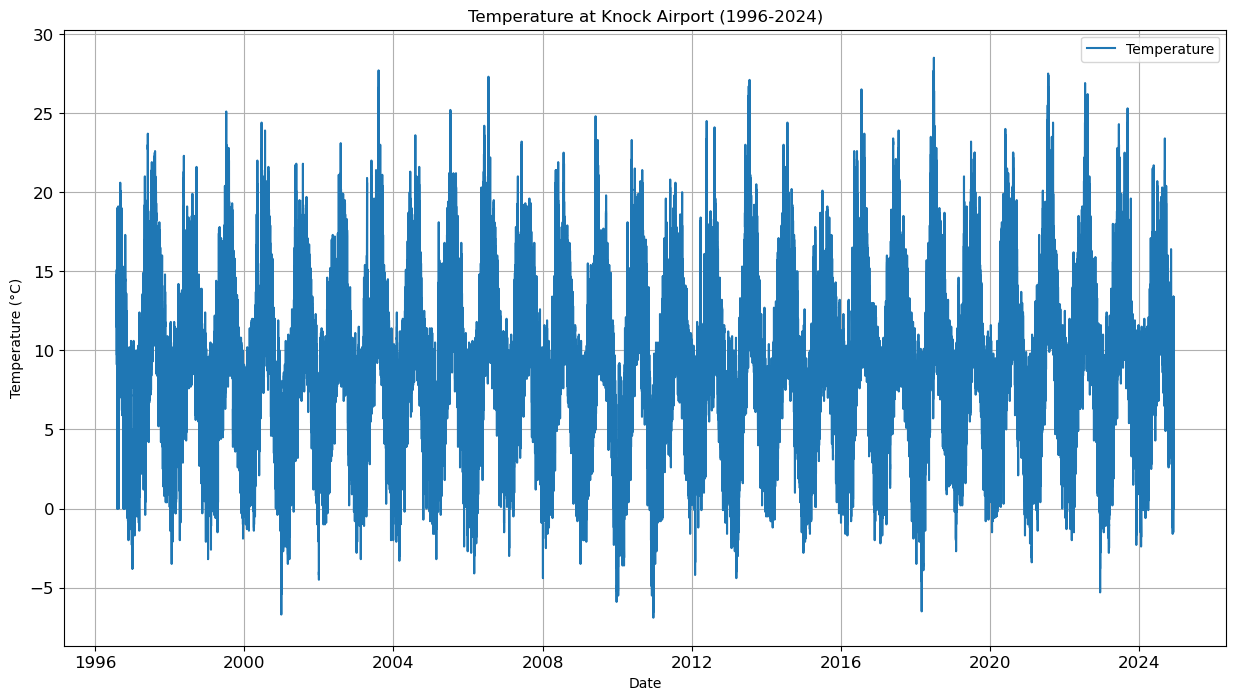

In [101]:
plt.figure(figsize=(15, 8))
plt.plot(df['date'], df['temp'], label='Temperature')
plt.title('Temperature at Knock Airport (1996-2024)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

The mean temperature each day:

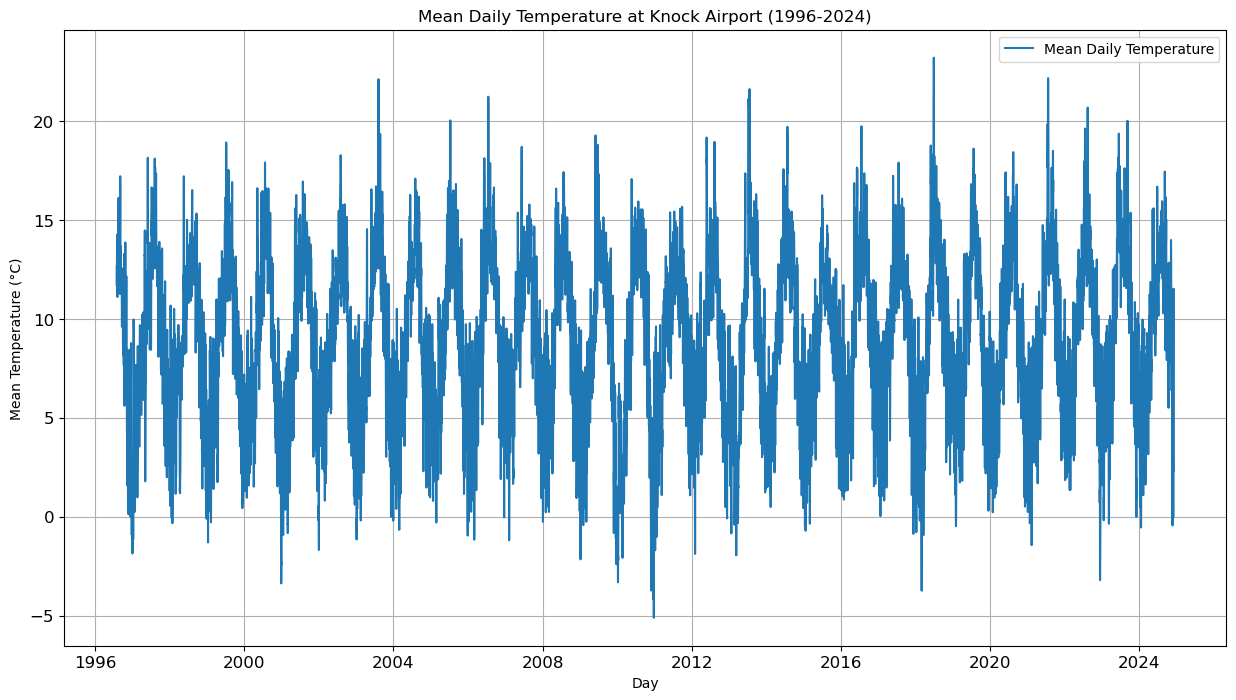

In [102]:
df['day'] = df['date'].dt.date
mean_temp_daily = df.groupby('day')['temp'].mean()

plt.figure(figsize=(15, 8))
plt.plot(mean_temp_daily.index, mean_temp_daily.values, label='Mean Daily Temperature')
plt.title('Mean Daily Temperature at Knock Airport (1996-2024)')
plt.xlabel('Day')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

The mean temperature for each month:

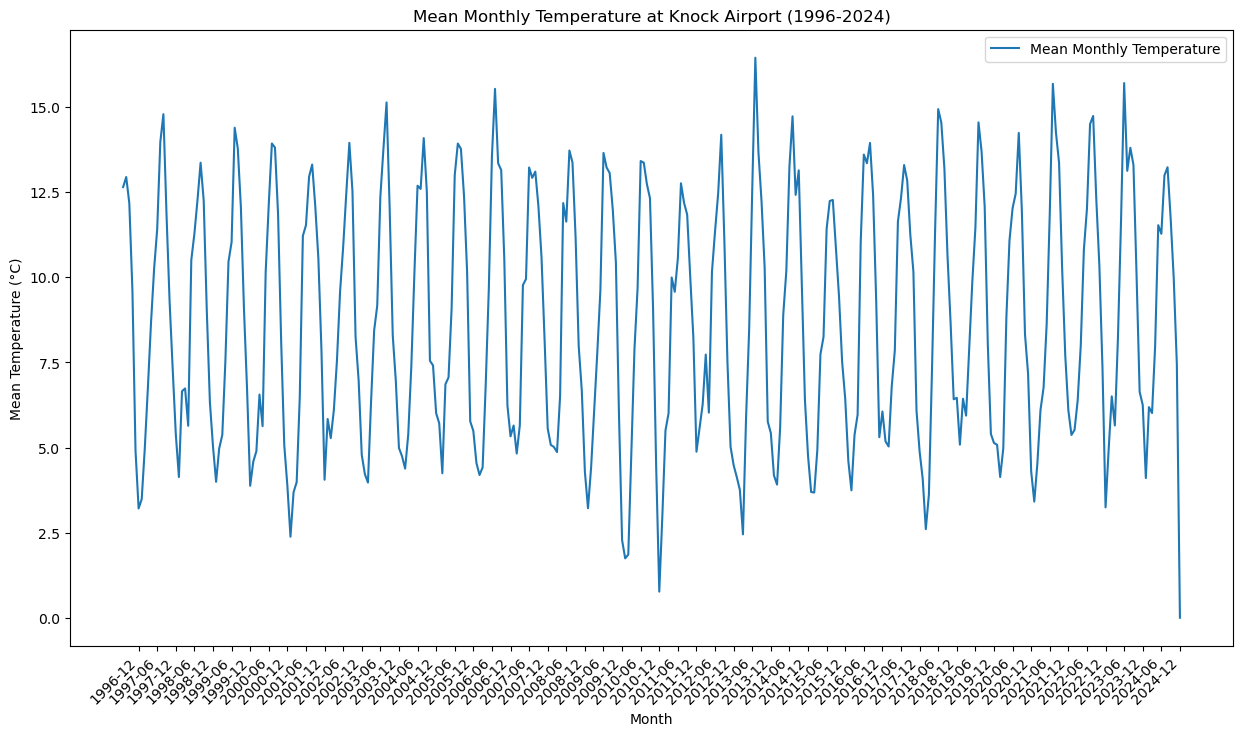

In [103]:
df['month'] = df['date'].dt.to_period('M')
mean_temp_monthly = df.groupby('month')['temp'].mean()

plt.figure(figsize=(15, 8))
plt.plot(mean_temp_monthly.index.astype(str), mean_temp_monthly.values, label='Mean Monthly Temperature')
plt.title('Mean Monthly Temperature at Knock Airport (1996-2024)')
plt.xlabel('Month')
jun_dec_xticks = [str(month) for month in monthly_mean_max_windspeed.index if month.month in [6, 12]]
plt.xticks(jun_dec_xticks, rotation=45, ha='right')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

The Windspeed:

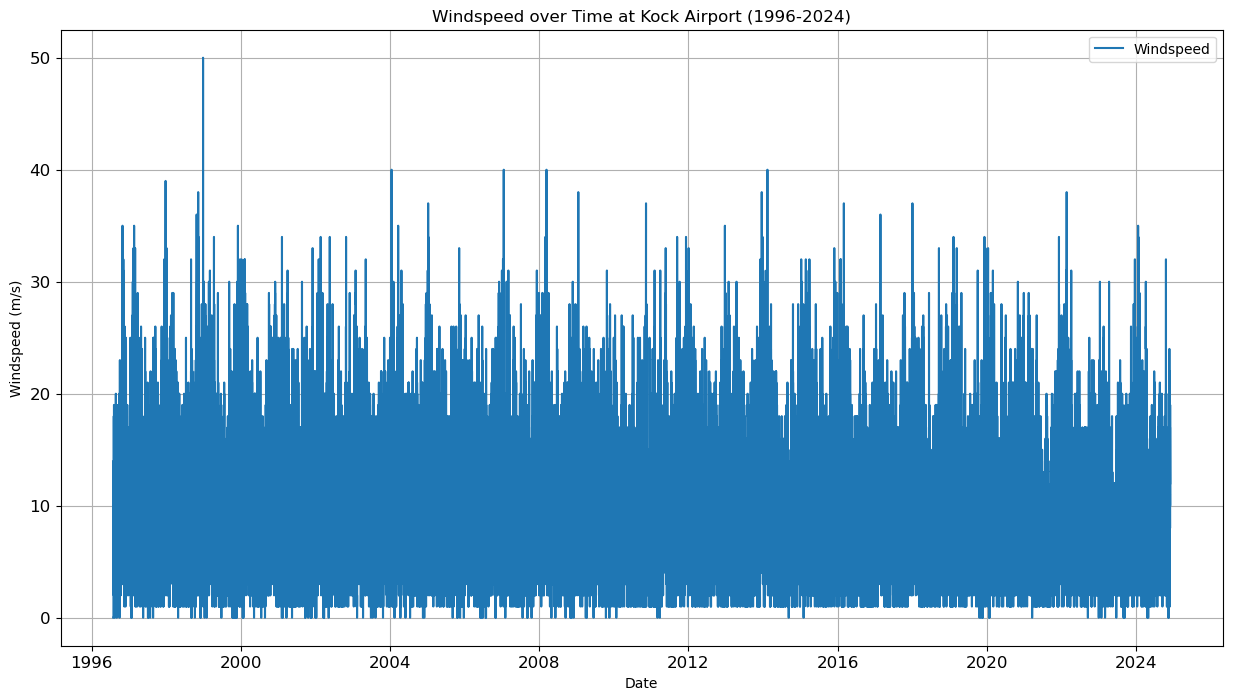

In [104]:
plt.figure(figsize=(15, 8))
plt.plot(df['date'], df['wdsp'], label='Windspeed')
plt.title('Windspeed over Time at Kock Airport (1996-2024)')
plt.xlabel('Date')
plt.ylabel('Windspeed (m/s)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

The rolling windspeed (over 24 hours):

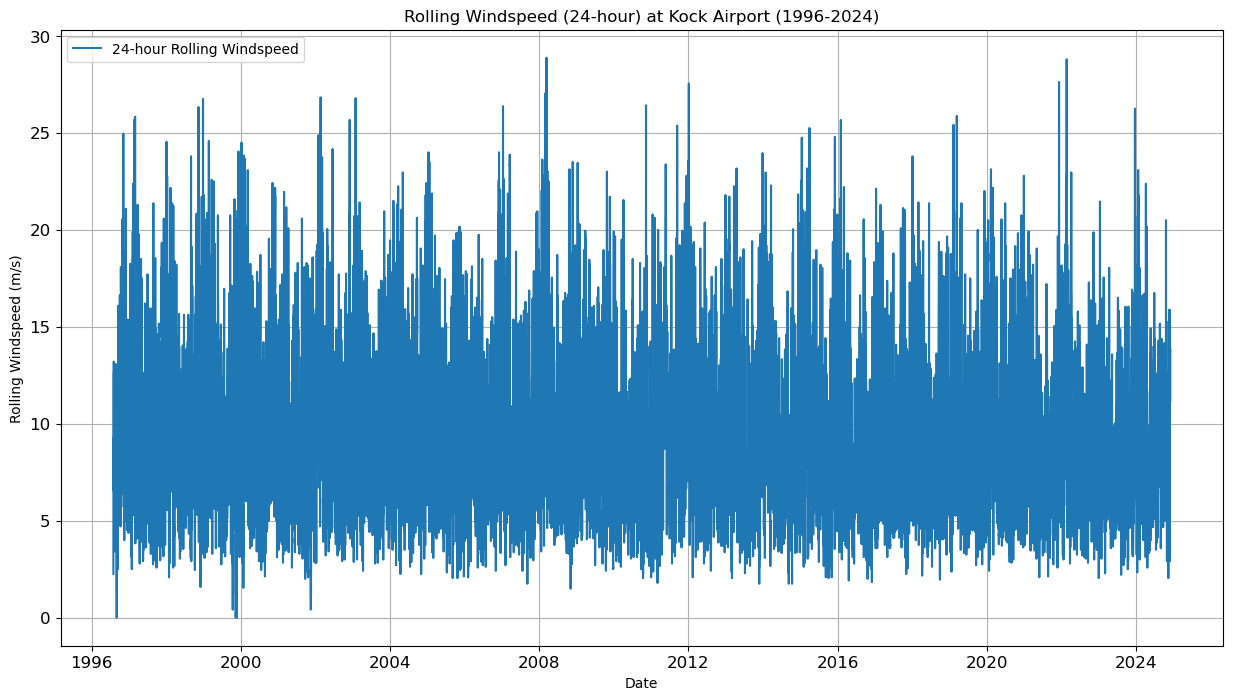

In [105]:
rolling_windspeed = df['wdsp'].rolling(window=24).mean()

plt.figure(figsize=(15, 8))
plt.plot(df['date'], rolling_windspeed, label='24-hour Rolling Windspeed')
plt.title('Rolling Windspeed (24-hour) at Kock Airport (1996-2024)')
plt.xlabel('Date')
plt.ylabel('Rolling Windspeed (m/s)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

The max windspeed for each day:

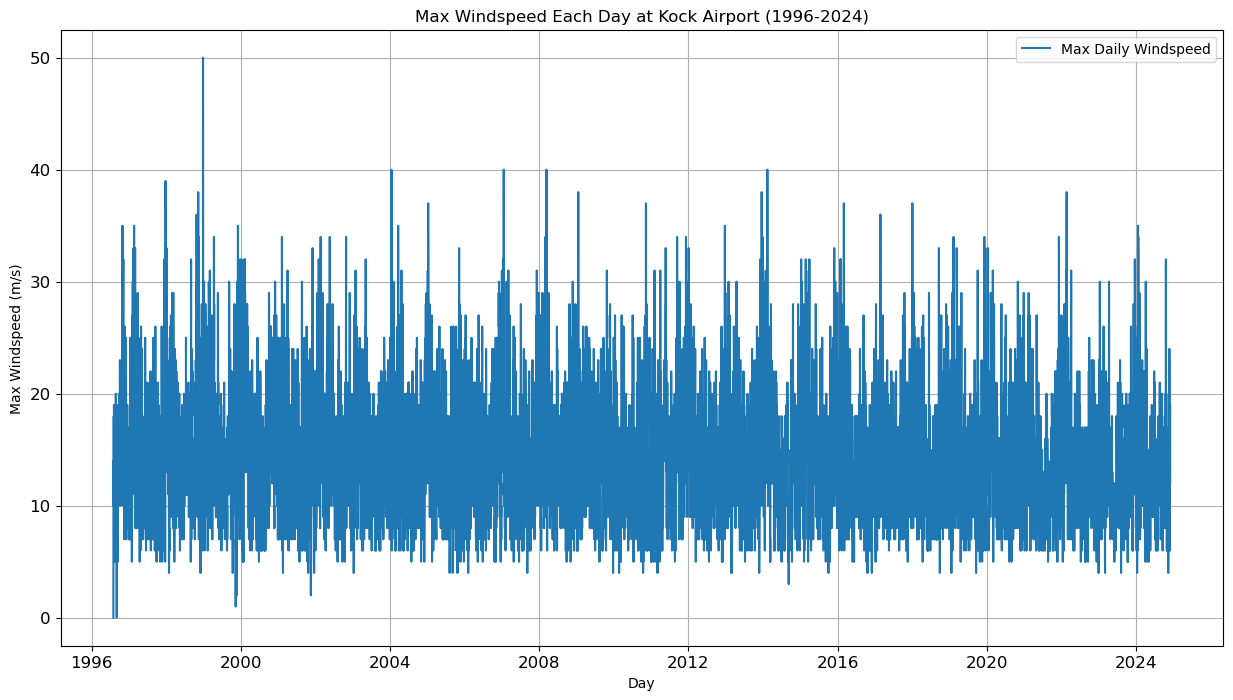

In [106]:
max_windspeed_daily = df.groupby('day')['wdsp'].max()

plt.figure(figsize=(15, 8))
plt.plot(max_windspeed_daily.index, max_windspeed_daily.values, label='Max Daily Windspeed')
plt.title('Max Windspeed Each Day at Kock Airport (1996-2024)')
plt.xlabel('Day')
plt.ylabel('Max Windspeed (m/s)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

The monthly mean of the daily max windspeeds:

***
## References

Matplotlib intro to plotting: https://matplotlib.org/stable/users/explain/quick_start.html

Python Datetime guide: https://docs.python.org/3/library/datetime.html

Real Python Guide to tidying data: https://realpython.com/python-data-cleaning-numpy-pandas/

***